# Análise Preditiva de Comportamento Financeiro para Aumento de Vendas e Retenção de Clientes
1. Introdução
Este projeto tem como objetivo aplicar técnicas de ciência de dados para analisar o comportamento financeiro dos clientes de uma instituição financeira. Utilizando um conjunto de dados real, exploraremos características demográficas, comportamentais e de crédito para desenvolver modelos preditivos que podem ajudar a alavancar vendas e aumentar a retenção de clientes. Este projeto é focado na aplicação prática para uma posição na área de Ciência de Dados, com ênfase em Marketing e Clientes.

# 2. Carregamento dos Dados
Vamos utilizar o Google Drive para carregar o arquivo CSV.

In [5]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Montando o Google Drive
drive.mount('/content/drive')

# Carregando o arquivo CSV
df = pd.read_csv('/content/drive/My Drive/dados/material.csv')

# Visualizando as primeiras linhas do dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


# 3. Pré-processamento dos Dados

Aqui, faremos ajustes para tratar as colunas com dados categóricos, como sexo, escolaridade, estado_civil, salario_anual e tipo_cartao. Também cuidaremos dos valores numéricos que podem estar com formatação inadequada (como vírgulas nos números).

In [16]:
# Remover vírgulas e converter colunas numéricas
# Convert the column to string type before applying str.replace
df['limite_credito'] = df['limite_credito'].astype(str).str.replace(',', '').astype(float)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].astype(str).str.replace(',', '').astype(float)

# Codificar variáveis categóricas
le = LabelEncoder()
df['sexo'] = le.fit_transform(df['sexo'])
df['escolaridade'] = le.fit_transform(df['escolaridade'])
df['estado_civil'] = le.fit_transform(df['estado_civil'])
df['salario_anual'] = le.fit_transform(df['salario_anual'])
df['tipo_cartao'] = le.fit_transform(df['tipo_cartao'])

# Verificando se há valores ausentes
df.isnull().sum()

,0
id,0
default,0
idade,0
sexo,0
dependentes,0
escolaridade,0
estado_civil,0
salario_anual,0
tipo_cartao,0
meses_de_relacionamento,0


# 4. Análise Exploratória de Dados (EDA)
A seguir, exploraremos os dados para identificar correlações e padrões.

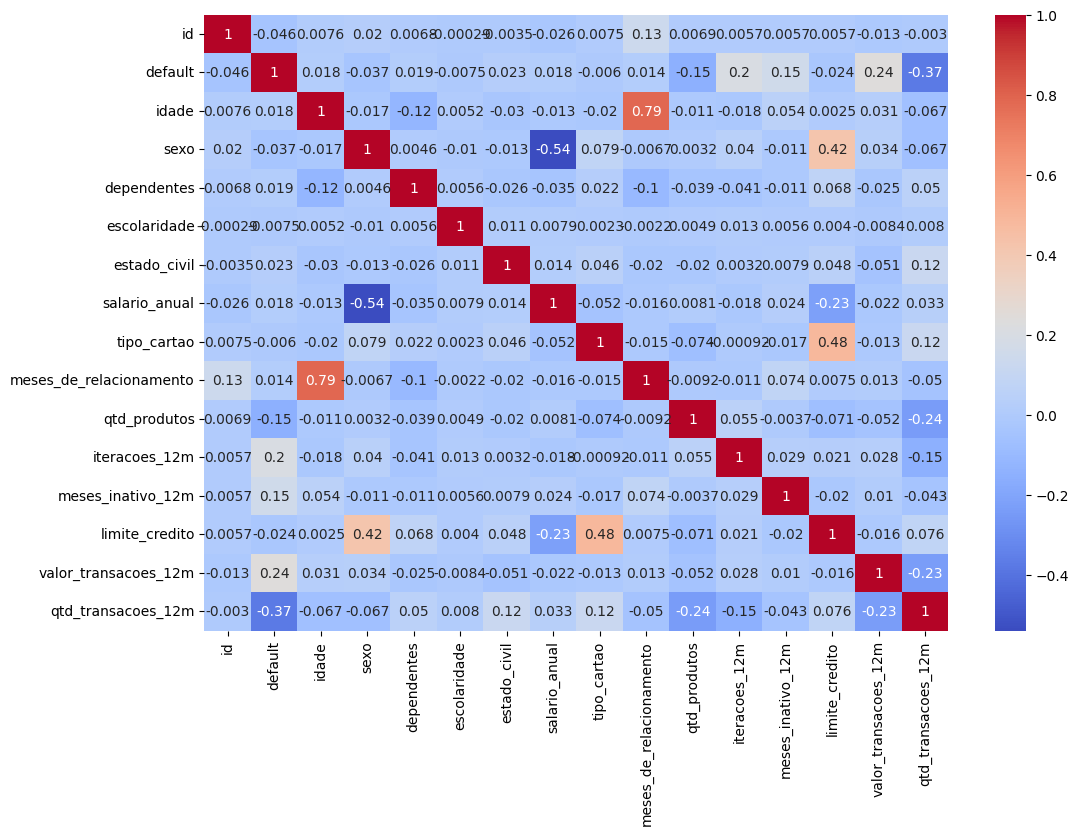

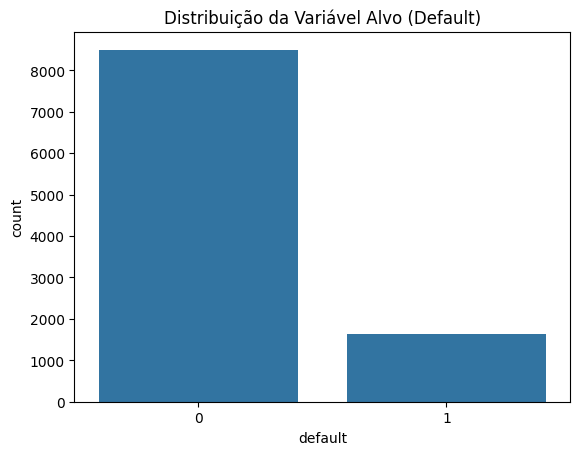

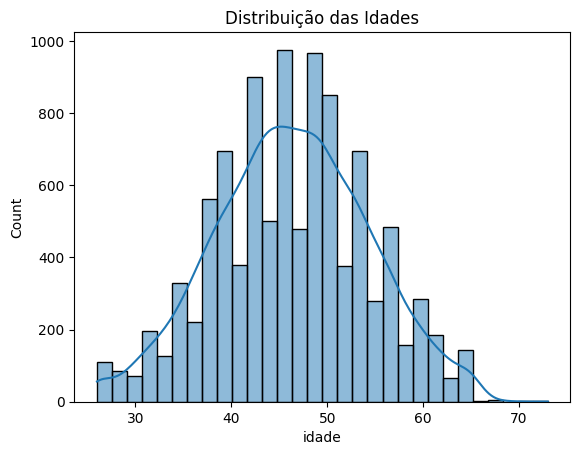

In [14]:
# Estatísticas descritivas
df.describe()

# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribuição da variável alvo (default)
sns.countplot(x='default', data=df)
plt.title('Distribuição da Variável Alvo (Default)')
plt.show()

# Distribuição das idades
sns.histplot(df['idade'], bins=30, kde=True)
plt.title('Distribuição das Idades')
plt.show()


# 5. Modelagem Preditiva
Usaremos a Regressão Logística para prever a inadimplência.

In [9]:
# Separar as variáveis independentes e dependentes
X = df.drop('default', axis=1)
y = df['default']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever os resultados
y_pred = model.predict(X_test)


# 6. Avaliação do Modelo
Vamos avaliar o desempenho do modelo usando várias métricas.

In [10]:
# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.8673905890095426

Matriz de Confusão:
 [[2454   89]
 [ 314  182]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92      2543
           1       0.67      0.37      0.47       496

    accuracy                           0.87      3039
   macro avg       0.78      0.67      0.70      3039
weighted avg       0.85      0.87      0.85      3039



# Explorando os Padrões de Comportamento Financeiro dos Clientes

## Descrição
Este projeto analisa o comportamento financeiro dos clientes de uma instituição financeira para fornecer insights valiosos sobre suas características e padrões de uso.

## Objetivos
- Analisar características demográficas e comportamentais dos clientes.
- Desenvolver um modelo preditivo para identificar clientes com maior risco de inadimplência.
- Avaliar a performance do modelo e fornecer recomendações.

## Passos do Projeto
1. **Importação de Bibliotecas e Configuração do Ambiente**
2. **Carregamento e Preparação dos Dados**
3. **Análise Exploratória dos Dados (EDA)**
4. **Modelagem Preditiva**
5. **Avaliação do Modelo e Resultados**

## Resultados
- Acurácia: 86.7%
- Matriz de Confusão: (exibir a matriz aqui)
- Relatório de Classificação: (incluir o relatório aqui)

## Documentação Adicional
Para mais detalhes sobre a implementação e análise, consulte as células de código no notebook.

## Licença
Este projeto está licenciado sob a MIT License - veja o arquivo [LICENSE](LICENSE) para mais detalhes.
